<a href="https://colab.research.google.com/github/Yashchauhan23/Deep_Learning/blob/main/ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
!pip install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [98]:
##import some basic libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [99]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [100]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
##divide the dataset into dependent and independent features
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [102]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [103]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [104]:
 ##feature Engineering
 Geography = pd.get_dummies(X['Geography'],drop_first=True)
 Gender = pd.get_dummies(X['Gender'],drop_first=True)

In [105]:
##concating these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [106]:
pd.concat([X,Geography,Gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [107]:
X=pd.concat([X,Geography,Gender],axis=1)

In [108]:
##splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [109]:
##feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [110]:
X_train.shape

(8000, 11)

In [111]:
##now create the ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [112]:
##lets initialize the ANN
classifier=Sequential() 

In [113]:
##adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [114]:
##adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [115]:
##adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [116]:
##adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [117]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [118]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [119]:
##Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [120]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4288 - accuracy: 0.8164 - val_loss: 0.3834 - val_accuracy: 0.8345
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3684 - accuracy: 0.8477 - val_loss: 0.3986 - val_accuracy: 0.8372
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3544 - accuracy: 0.8565 - val_loss: 0.3599 - val_accuracy: 0.8485
Epoch 4/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3500 - accuracy: 0.8550 - val_loss: 0.3605 - val_accuracy: 0.8508
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3465 - accuracy: 0.8561 - val_loss: 0.3602 - val_accuracy: 0.8531
Epoch 6/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.3479 - accuracy: 0.8580 - val_loss: 0.3597 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3433 - accuracy: 0.8615 - val_loss: 0.3574 - val_accuracy:

In [121]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

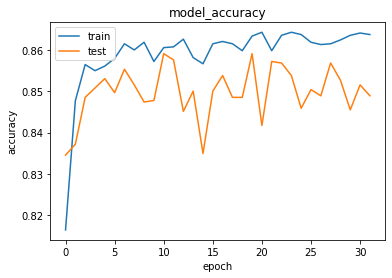

In [122]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

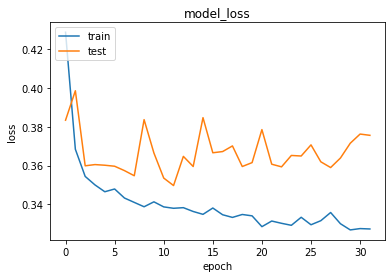

In [127]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [128]:
## making the prediction and evaluate the model
##predicting the test set results

Y_pred=classifier.predict(X_test)
Y_pred=(Y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [130]:
## make the confusion matrix

from sklearn.metrics import confusion_matrix
ym=confusion_matrix(Y_test, Y_pred )
ym

array([[1478,  117],
       [ 170,  235]])

In [131]:
## calculate the accuracy

from sklearn.metrics import accuracy_score
score =  accuracy_score(Y_pred, Y_test)

In [132]:
score

0.8565

In [134]:
## get the weights

classifier.get_weights() 

[array([[ 0.01169838,  1.8335587 , -0.22344503, -0.3512348 , -0.27846083,
         -0.13669355,  0.06429894,  0.15067214,  0.00625845,  1.0174994 ,
         -0.664166  ],
        [-0.3673847 , -1.9090989 , -2.458127  ,  1.8899611 , -2.2893493 ,
         -0.04130967, -2.4110231 , -2.3767257 , -0.14953792, -0.3928088 ,
         -0.5718484 ],
        [ 1.1530901 , -0.3420437 ,  0.53737205, -0.32113072, -0.32204384,
         -0.30325842, -0.70770806, -0.59915274,  0.30327958, -0.00734872,
          1.2312832 ],
        [-2.1916444 , -0.75317085, -0.02498057, -0.41132128, -2.430091  ,
          0.32762963,  1.1271098 , -1.0166956 , -2.7275639 , -0.54000366,
          0.37098077],
        [ 1.6152109 , -0.4507163 ,  0.09886837, -0.3449067 ,  0.48032108,
          2.840891  ,  0.3592074 ,  0.16275528, -3.2275248 , -0.6382048 ,
         -0.3959564 ],
        [ 0.27055553,  1.6434902 ,  0.19947161,  0.13804181, -0.6785974 ,
          0.18276939, -0.8244109 , -0.59152395, -0.03841934,  0.1545949